In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import scipy.stats as sps
sns.set()

from scipy.stats import spearmanr, pearsonr, kendalltau

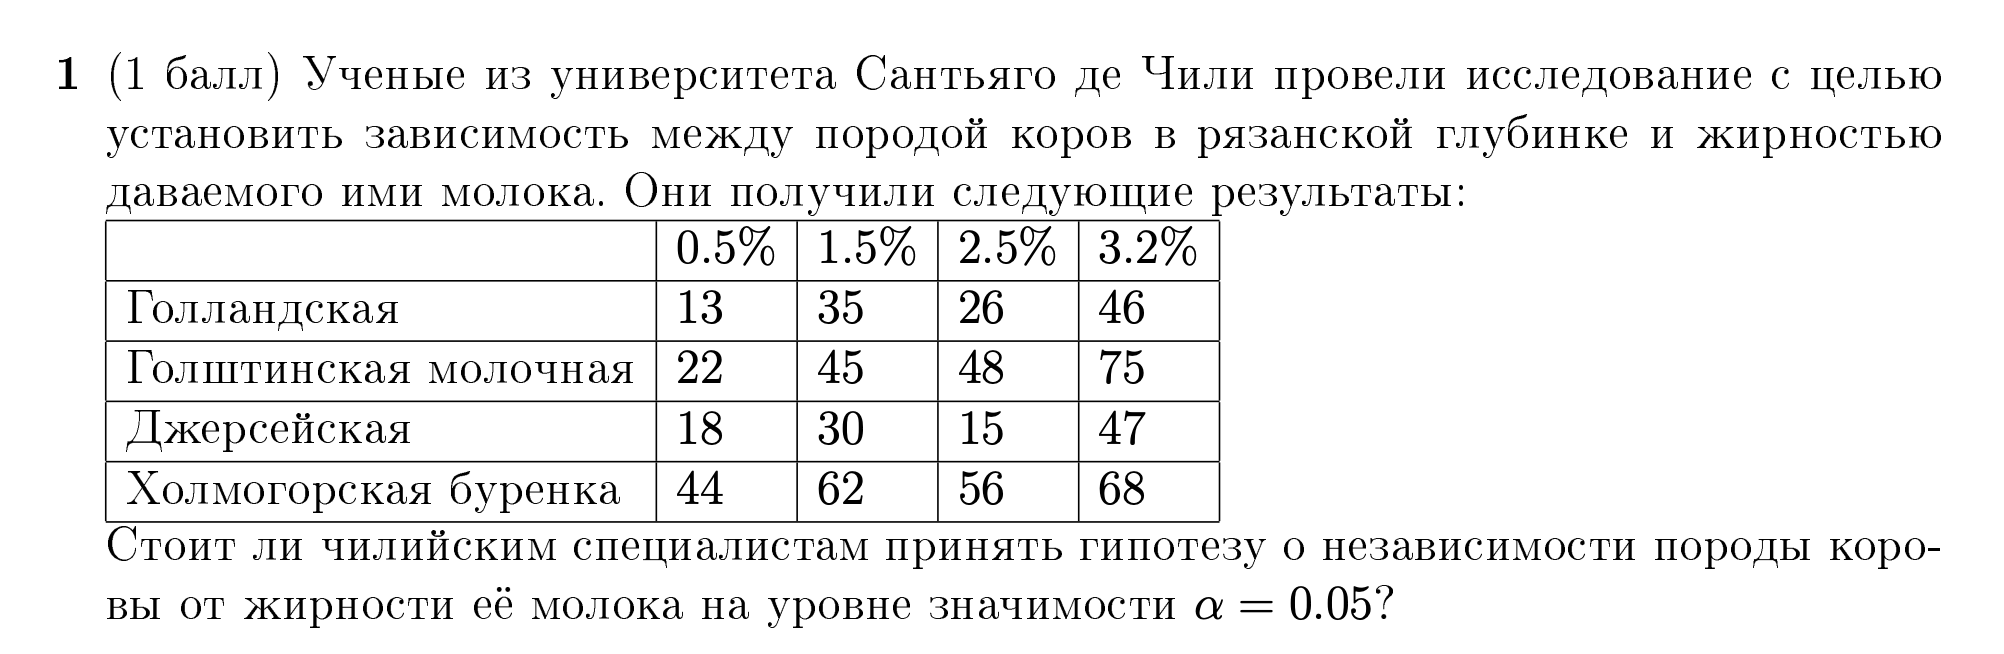

In [ ]:
alpha = 0.05

data = pd.DataFrame(
    {
        '0.5%': [13, 22, 18, 44],
        '1.5%': [35, 45, 30, 62],
        '2.5%': [26, 48, 15, 56],
        '3.2%': [46, 75, 47, 68],
    },
    index=['Голландская', 'Голштинская молочная', 'Джерсейская', 'Холмогорская буренка']    
)
data

,0.5%,1.5%,2.5%,3.2%
Голландская,13,35,26,46
Голштинская молочная,22,45,48,75
Джерсейская,18,30,15,47
Холмогорская буренка,44,62,56,68


Проверим гипотезу о том что порода не зависит от жирности молока. Хочу использовать критерий хи-квадрат. Однако в первую очередь надо проверить условия применимости критерия

Одно из условий применимости критерия состоит в том, что не более, чем для 20% пар $(i, j)$ выполнено, что $\frac{n_{i \bullet} n_{\bullet j}}{n} < 5$. Таким образом, последнее возвращаемое значение соответсвующей функции можно использовать для определения применимости критерия..

In [ ]:
chi2, p, dof, expected = sps.chi2_contingency(data)
(expected < 5).mean()

0.0

Критерий применим так как не более чем у 20% expected < 5

In [ ]:
chi2, p

(16.275891254401127, 0.06133904461935207)

In [ ]:
print('Гипотеза отвергается') if p < alpha else print('Гипотеза не отвергается')

Гипотеза не отвергается


Мы не отвергли гипотезу о независимости породы от жирности, а значит что результат статистически незначим.

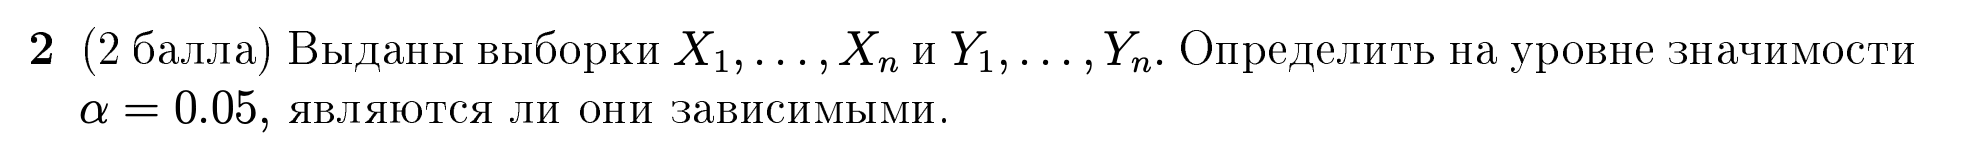

Здесь дано две пары выборок. начнем с первой

In [ ]:
data = np.load('hw5t2a.npy')
X = data[:, 0]
Y = data[:, 1]
len(X), len(Y)

(200, 200)

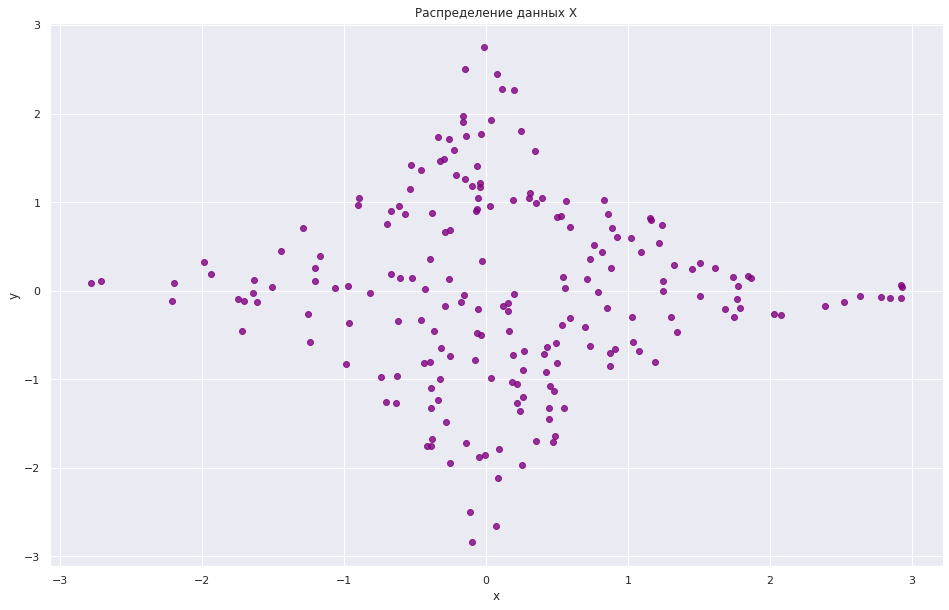

In [ ]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))

  plt.title('Распределение данных X')
  plt.scatter(X, Y, c='purple', alpha=0.8)
  plt.xlabel('x')
  plt.ylabel('y')

Видно что какая. то завичимость видимо есть

Посмотрим на гистограммы и посмотрим что скажет критерий Шапиро-Уилка

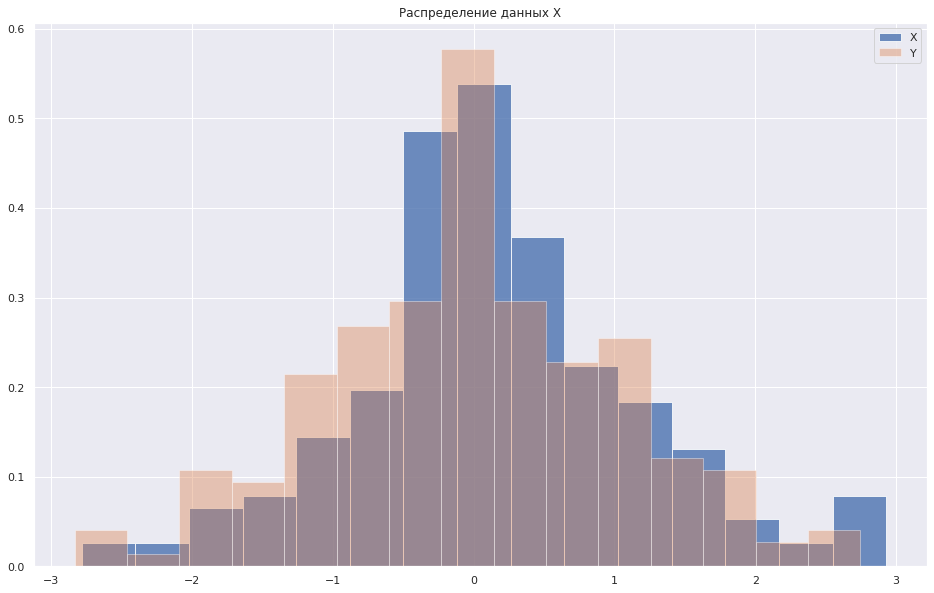

In [ ]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Распределение данных X')
  plt.hist(X, alpha=0.8, bins=15, density=True, label='X')
  plt.hist(Y, alpha=0.4, bins=15, density=True, label='Y')
  plt.legend(loc='best')

In [ ]:
sps.shapiro(X)

ShapiroResult(statistic=0.9791221618652344, pvalue=0.004473720211535692)

In [ ]:
sps.shapiro(Y)

ShapiroResult(statistic=0.9947082996368408, pvalue=0.7067685127258301)

Видно что для первой выборки гипотеза о нормальности будет отвергнута, а для второй нет

Найдем все три коэффициента корреляции

In [ ]:
print(f'Коэффициент Пирсона:')
print(pearsonr(X, Y), '\n')
print(f'Коэффициент Спирмена:')
print(spearmanr(X, Y), '\n')
print(f'Коэффициент Кендалла:')
print(kendalltau(X, Y), '\n')

Коэффициент Пирсона:
PearsonRResult(statistic=-0.025961027346907174, pvalue=0.7151826143470752) 

Коэффициент Спирмена:
SignificanceResult(statistic=-0.04081752043801095, pvalue=0.5660571738070647) 

Коэффициент Кендалла:
SignificanceResult(statistic=-0.019597989949748745, pvalue=0.6802458220697412) 



Согласно значениям всех трех коэффициентов корреляции, зависимость между данными отсутствует. (нулевая гипотеза - что выборки нескореллированы и мы ее не отвергаем)

Так что давайте перейдем к таблицам сопряженности

Разбиваем ось `Оx` на промежутки точками `-np.inf, -0.5, 0.5, np.inf`

Разбиваем ось `Оy` на промежутки точками `-np.inf, -0.5, 0.5, np.inf`


In [ ]:
X_bin = pd.cut(X, [-np.inf, -0.5, 0.5, np.inf])
Y_bin = pd.cut(Y, [-np.inf, -0.5, 0.5, np.inf])

In [ ]:
df = pd.DataFrame(
    {
        'X': X,
        'Y': Y,
        'X_bin': X_bin,
        'Y_bin': Y_bin,
    }, 
)
df

,X,Y,X_bin,Y_bin
0,-0.970972,0.050214,"(-inf, -0.5]","(-0.5, 0.5]"
1,-0.696865,0.752624,"(-inf, -0.5]","(0.5, inf]"
2,1.218057,0.539155,"(0.5, inf]","(0.5, inf]"
3,1.509003,0.314469,"(0.5, inf]","(-0.5, 0.5]"
4,0.494606,-0.588871,"(-0.5, 0.5]","(-inf, -0.5]"
...,...,...,...,...
195,1.777160,0.054557,"(0.5, inf]","(-0.5, 0.5]"
196,-0.324787,-0.993537,"(-0.5, 0.5]","(-inf, -0.5]"
197,0.078561,2.443968,"(-0.5, 0.5]","(0.5, inf]"
198,1.033270,-0.574604,"(0.5, inf]","(-inf, -0.5]"


In [ ]:
data_chi = df.pivot_table(values='X', index='X_bin', columns='Y_bin', aggfunc='count', fill_value=0)
data_chi

Y_bin,"(-inf, -0.5]","(-0.5, 0.5]","(0.5, inf]"
X_bin,,,
"(-inf, -0.5]",6,26,9
"(-0.5, 0.5]",45,16,36
"(0.5, inf]",8,40,14


Проверим применимость хи-квадрат аналогично 1 задаче

In [ ]:
chi2, p, dof, expected = sps.chi2_contingency(data_chi)
(expected < 5).mean()

0.0

Все хорошо - смотрим p_value

In [ ]:
chi2, p

(49.54058453424397, 4.5031674582895365e-10)

Ура - мы отвергаем гипотезу о независимости из чего следует что данные зависимы

Но я хочу уточнить пару моментов чтоб не было недопониманий по типу - почему коэф не отвергают а мы в итоге говорим что признаки зависимы?

Дело в том что коэффициентами корреляции мы проверяем гипотезу о нескореллированности выборок. Из-за того что независимость сильнее нескореллированности (то есть независимы -> нескореллированы но не наоборот), если бы мы отвергли гипотезу о нескореллированности, мы б смогли утверждать что тогда они зависимы. Но этого не случилось и мы перешли к более мощной проверке - где нулевая гипотеза формулируется по другому - признаки независимы. И в итоге мы ее отвергли и все хорошо)

Повторим все то же самое для вторых данных

In [ ]:
data = np.load('hw5t2b.npy')
X = data[:, 0]
Y = data[:, 1]
len(X), len(Y)

(200, 200)

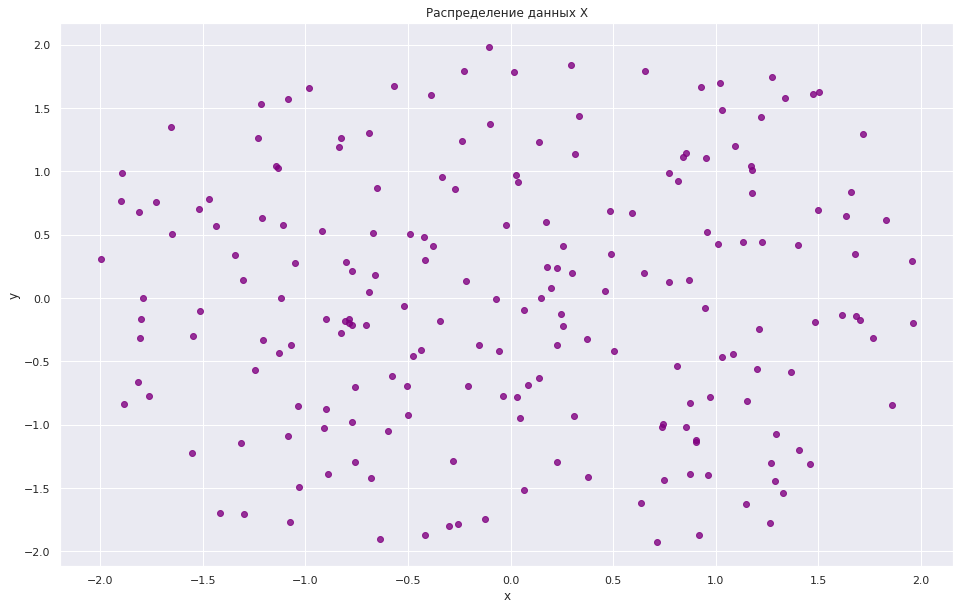

In [ ]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))

  plt.title('Распределение данных X')
  plt.scatter(X, Y, c='purple', alpha=0.8)
  plt.xlabel('x')
  plt.ylabel('y')

Тут уже не похоже чтоб была зависимость

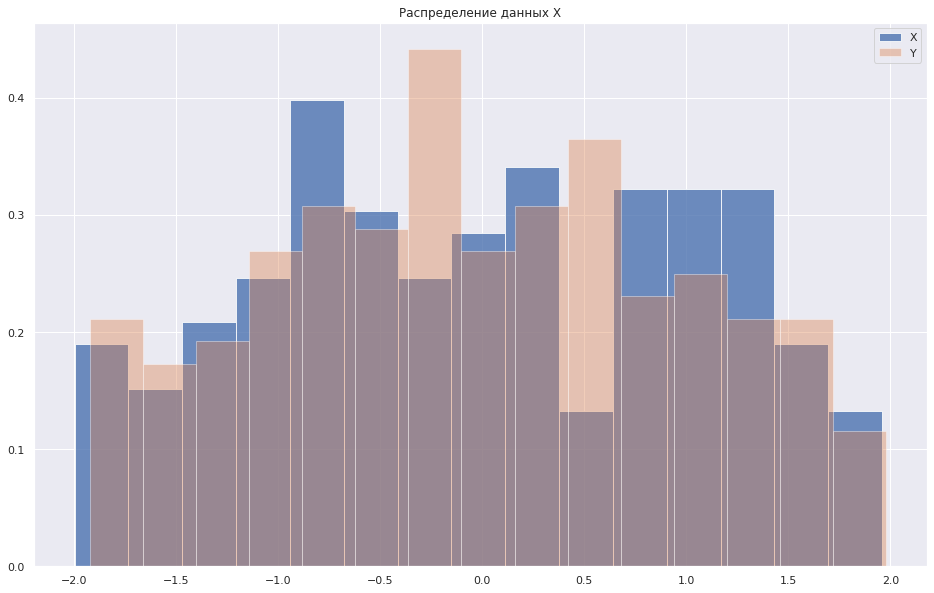

In [ ]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title('Распределение данных X')
  plt.hist(X, alpha=0.8, bins=15, density=True, label='X')
  plt.hist(Y, alpha=0.4, bins=15, density=True, label='Y')
  plt.legend(loc='best')

In [ ]:
sps.shapiro(X).pvalue, sps.shapiro(Y).pvalue

(0.0001336469576926902, 0.002188140759244561)

Для обеих выборок отвергаем гипотезу о нормальности

In [ ]:
print(f'Коэффициент Пирсона:')
print(pearsonr(X, Y), '\n')
print(f'Коэффициент Спирмена:')
print(spearmanr(X, Y), '\n')
print(f'Коэффициент Кендалла:')
print(kendalltau(X, Y), '\n')

Коэффициент Пирсона:
PearsonRResult(statistic=0.01763273469810937, pvalue=0.8042730872519641) 

Коэффициент Спирмена:
SignificanceResult(statistic=0.014712367809195232, pvalue=0.8361884433241937) 

Коэффициент Кендалла:
SignificanceResult(statistic=0.007738693467336683, pvalue=0.870725035513317) 



Снова все критерии не отвергают гипотезу о нескореллированности

In [ ]:
X_bin = pd.cut(X, [-np.inf, -0.5, 0.5, np.inf])
Y_bin = pd.cut(Y, [-np.inf, -0.5, 0.5, np.inf])
df = pd.DataFrame(
    {
        'X': X,
        'Y': Y,
        'X_bin': X_bin,
        'Y_bin': Y_bin,
    }, 
)
df

,X,Y,X_bin,Y_bin
0,1.032568,1.482738,"(0.5, inf]","(0.5, inf]"
1,0.946170,-0.079728,"(0.5, inf]","(-0.5, 0.5]"
2,1.211492,-0.246103,"(0.5, inf]","(-0.5, 0.5]"
3,-0.800356,0.282322,"(-inf, -0.5]","(-0.5, 0.5]"
4,-0.207131,-0.690330,"(-0.5, 0.5]","(-inf, -0.5]"
...,...,...,...,...
195,-1.884512,-0.839700,"(-inf, -0.5]","(-inf, -0.5]"
196,1.660150,0.835024,"(0.5, inf]","(0.5, inf]"
197,1.460386,-1.309204,"(0.5, inf]","(-inf, -0.5]"
198,1.130282,0.444292,"(0.5, inf]","(-0.5, 0.5]"


In [ ]:
data_chi = df.pivot_table(values='X', index='X_bin', columns='Y_bin', aggfunc='count', fill_value=0)
data_chi

Y_bin,"(-inf, -0.5]","(-0.5, 0.5]","(0.5, inf]"
X_bin,,,
"(-inf, -0.5]",24,25,24
"(-0.5, 0.5]",15,23,18
"(0.5, inf]",26,20,25


In [ ]:
chi2, p, dof, expected = sps.chi2_contingency(data_chi)
(expected < 5).mean()

0.0

In [ ]:
chi2, p

(2.572846544523765, 0.6316406959567995)

В этот раз мы не отвергаем гипотезу о независимости

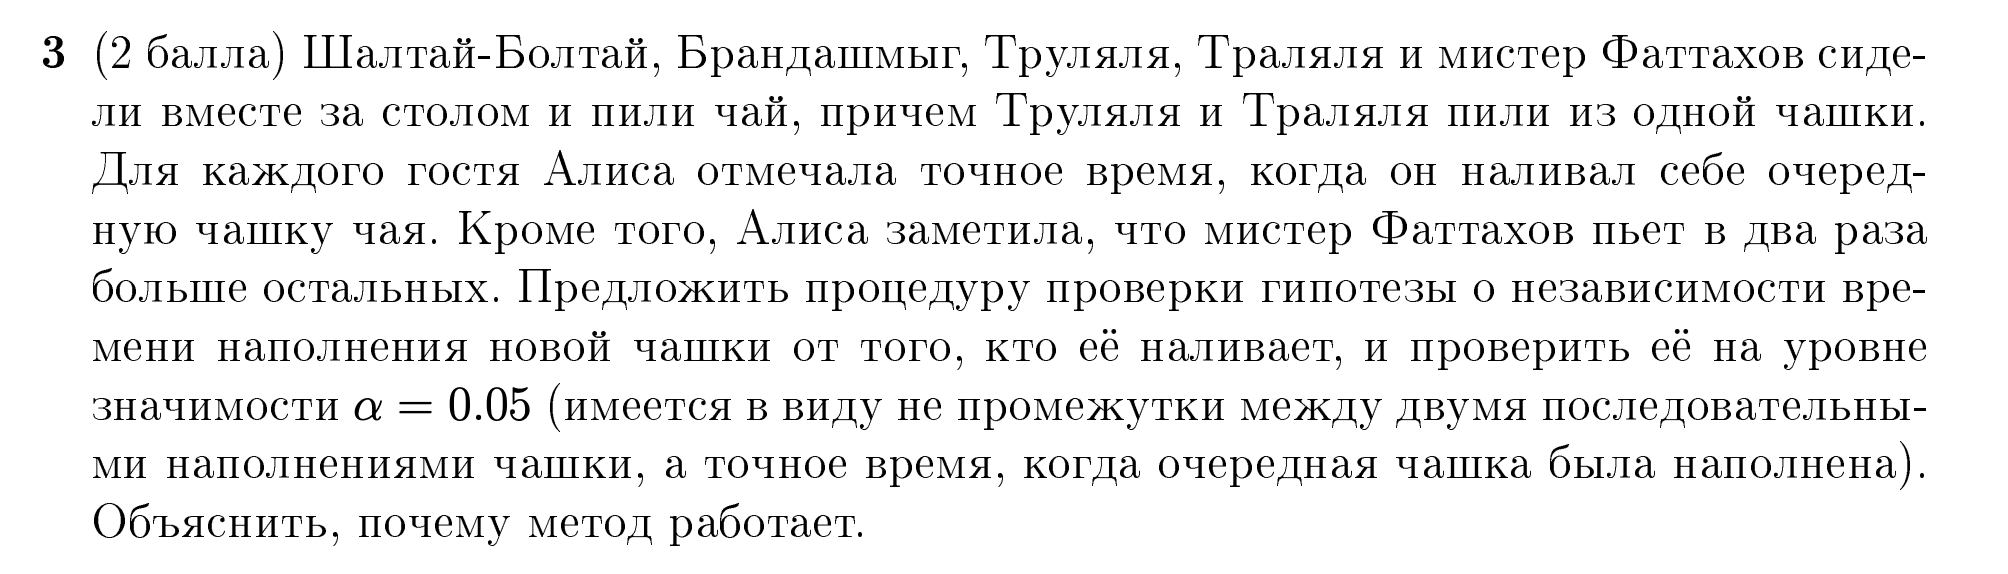

In [ ]:
alpha = 0.05

data = np.load('hw5t3.npy')
data[:10]

array([['Humpty-Dumpty', '20.2746443343'],
       ['Humpty-Dumpty', '10.9149413639'],
       ['Bandersnatch', '12.5698948252'],
       ['Humpty-Dumpty', '23.4057721493'],
       ['Humpty-Dumpty', '2.02567861426'],
       ['Bandersnatch', '0.772110233336'],
       ['Humpty-Dumpty', '16.2546733036'],
       ['Tweedledee and Tweedledum', '23.5861823014'],
       ['Tweedledee and Tweedledum', '22.6999924202'],
       ['Mr. Fattakhov', '17.9541025626']], dtype='<U25')

In [ ]:
X = data[:, 0]
Y = data[:, 1].astype(float)
len(X), len(Y)

(400, 400)

In [ ]:
len(X[X=='Mr. Fattakhov'])

154

In [ ]:
len(X[X=='Humpty-Dumpty']), len(X[X=='Bandersnatch']), len(X[X=='Tweedledee and Tweedledum'])

(75, 97, 74)

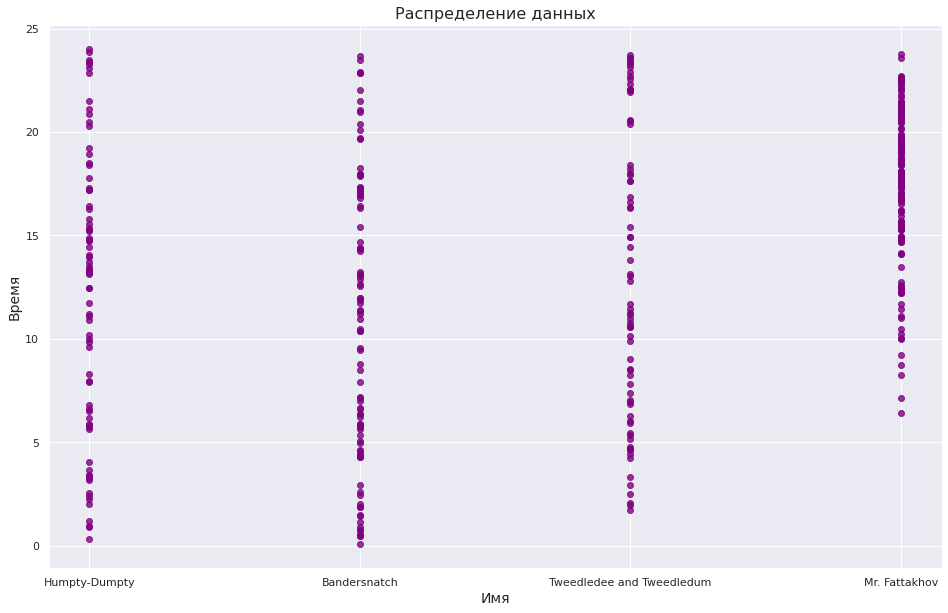

In [ ]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))

  plt.title('Распределение данных', fontsize=16)
  plt.scatter(X, Y, c='purple', alpha=0.8)
  plt.xlabel('Имя', fontsize=14)
  plt.ylabel('Время', fontsize=14)

Попробуем применить критерий хи-квадрат  - аналогично предыдущей задаче разобьем выборку на бины - слава богу у нас конечное число значений

Условие про то что Фаттахов пьет в два раза чаще дано не спроста - мы должны убедиться что не будет парадокса Симпсона - когда происходит несогласованность в выводах из-за отличий в размерах групп(у нас на лицо одна группа в два раза превышающая остальные)

Для этого сначала посмотрим как распределятчя данные если мы разобьем на 4 одинаковых бина

In [ ]:
Y.max()

23.9920188238

In [ ]:
Y_bin = pd.cut(Y, [0, 6, 12, 18, 24])
df = pd.DataFrame(
    {
        'X': X,
        'Y': Y,
        'Y_bin': Y_bin,
    }, 
)
df

,X,Y,Y_bin
0,Humpty-Dumpty,20.274644,"(18, 24]"
1,Humpty-Dumpty,10.914941,"(6, 12]"
2,Bandersnatch,12.569895,"(12, 18]"
3,Humpty-Dumpty,23.405772,"(18, 24]"
4,Humpty-Dumpty,2.025679,"(0, 6]"
...,...,...,...
395,Humpty-Dumpty,19.213886,"(18, 24]"
396,Bandersnatch,17.016539,"(12, 18]"
397,Tweedledee and Tweedledum,20.407802,"(18, 24]"
398,Bandersnatch,17.893657,"(12, 18]"


In [ ]:
data_chi = df.pivot_table(values='Y', index='X', columns='Y_bin', aggfunc='count', fill_value=0)
data_chi

Y_bin,"(0, 6]","(6, 12]","(12, 18]","(18, 24]"
X,,,,
Bandersnatch,30,24,29,14
Humpty-Dumpty,18,15,26,16
Mr. Fattakhov,0,13,66,75
Tweedledee and Tweedledum,16,22,15,21


Очевидно, что данные распределены неверно

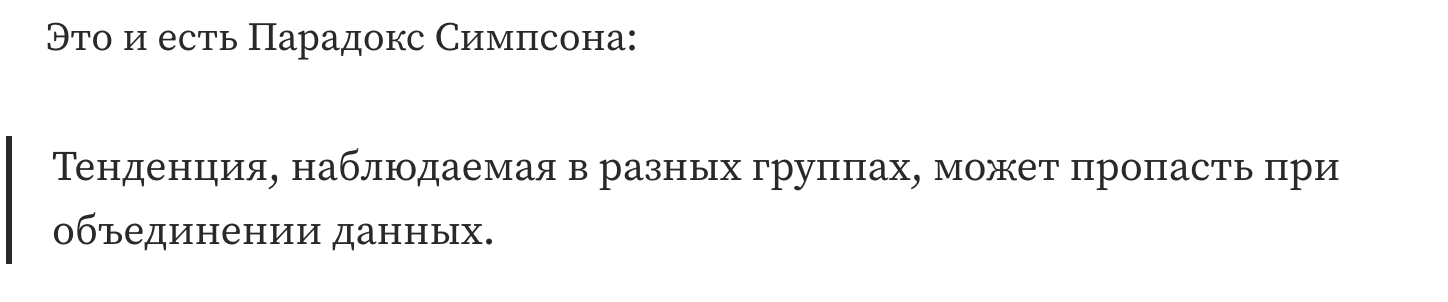

Нанесем данные по каждой группе времени на плоскость

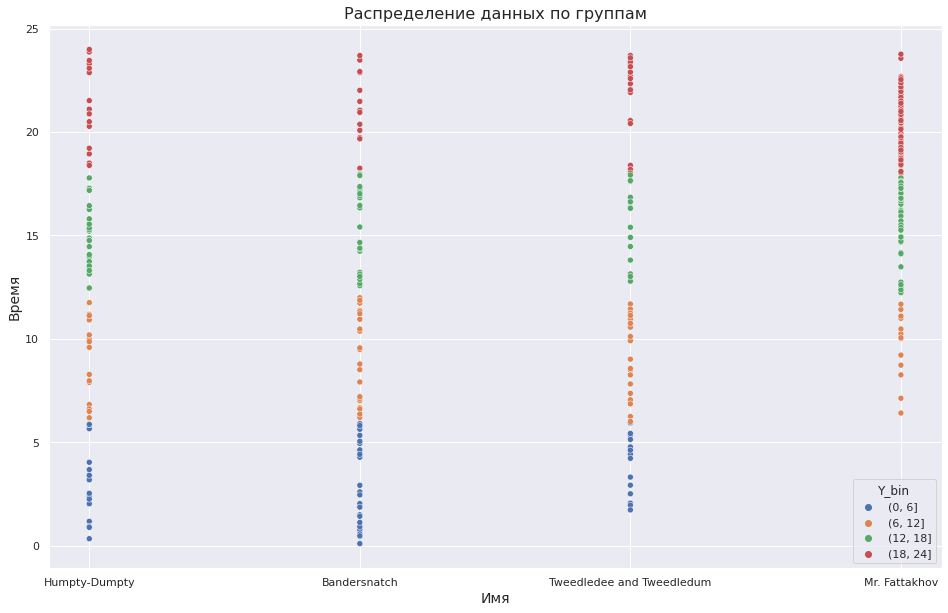

In [ ]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))

  plt.title('Распределение данных по группам', fontsize=16)
  sns.scatterplot(x="X", y="Y", hue="Y_bin", data=df);
  plt.xlabel('Имя', fontsize=14)
  plt.ylabel('Время', fontsize=14)

В целом видно, что неравномерно распределено только Фаттахов - у меня нет лучше идеи чем поделить его значения на 2

In [ ]:
data_chi_weighted = data_chi
data_chi_weighted.loc['Mr. Fattakhov'] = data_chi_weighted.loc['Mr. Fattakhov'] / 2
data_chi_weighted

Y_bin,"(0, 6]","(6, 12]","(12, 18]","(18, 24]"
X,,,,
Bandersnatch,30,24.0,29,14.0
Humpty-Dumpty,18,15.0,26,16.0
Mr. Fattakhov,0,6.5,33,37.5
Tweedledee and Tweedledum,16,22.0,15,21.0


In [ ]:
sums_names = [97, 74, 77, 74]

for i in range(4):
  data_for_row = data_chi_weighted.iloc[i]
  percents = data_chi_weighted.iloc[i] / sums_names[i]
  print(percents)

Y_bin
(0, 6]      0.309278
(6, 12]     0.247423
(12, 18]    0.298969
(18, 24]    0.144330
Name: Bandersnatch, dtype: float64
Y_bin
(0, 6]      0.243243
(6, 12]     0.202703
(12, 18]    0.351351
(18, 24]    0.216216
Name: Humpty-Dumpty, dtype: float64
Y_bin
(0, 6]      0.000000
(6, 12]     0.084416
(12, 18]    0.428571
(18, 24]    0.487013
Name: Mr. Fattakhov, dtype: float64
Y_bin
(0, 6]      0.216216
(6, 12]     0.297297
(12, 18]    0.202703
(18, 24]    0.283784
Name: Tweedledee and Tweedledum, dtype: float64


Не скажу что мы супер хорошо поделили, но во первых мы пользовались информацией из условия (а это лучше чем тыкаться вслепую) а во вторых - все таки лучше стало

In [ ]:
chi2, p, dof, expected = sps.chi2_contingency(data_chi_weighted)
(expected < 5).mean()

0.0

In [ ]:
chi2, p

(57.35980574420681, 4.311973739713763e-09)

Гипотеза о независимости отвергается - но в целом это было ожидаемо.

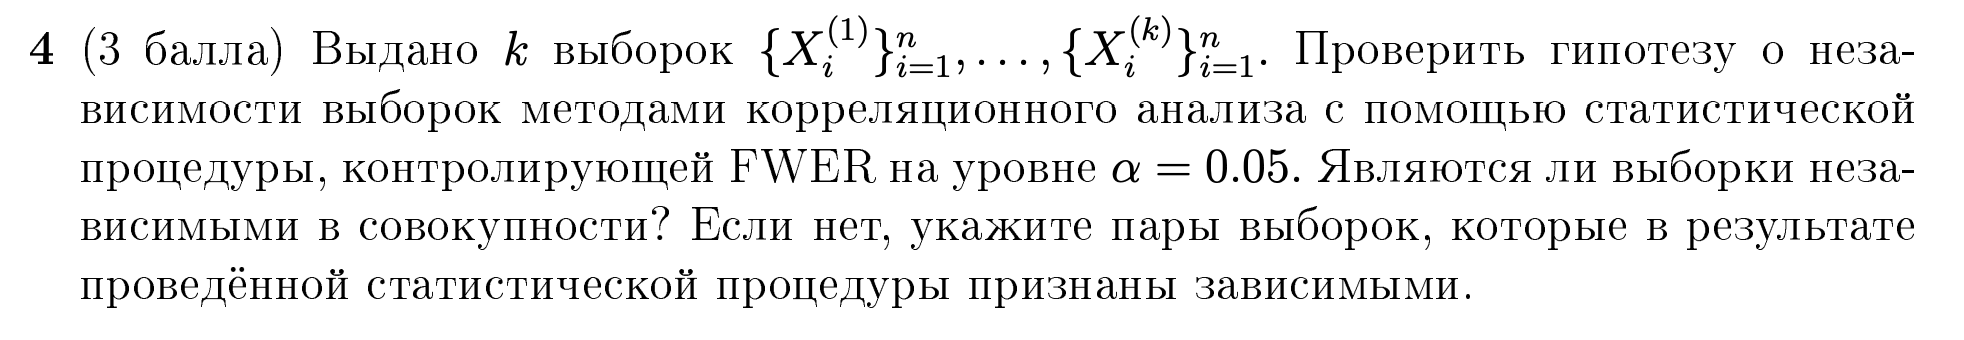

In [ ]:
alpha = 0.05

data = np.load('hw5t4.npy')
data.shape

(10, 100)

Сначала я построю попарные графики(просто хочется какой-то визуализации)

всего так как признаков 10 - то графиков будет $C_{10}^2 = 45$



<ipython-input-92-f203c0afe00f>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9, 5, cnt)


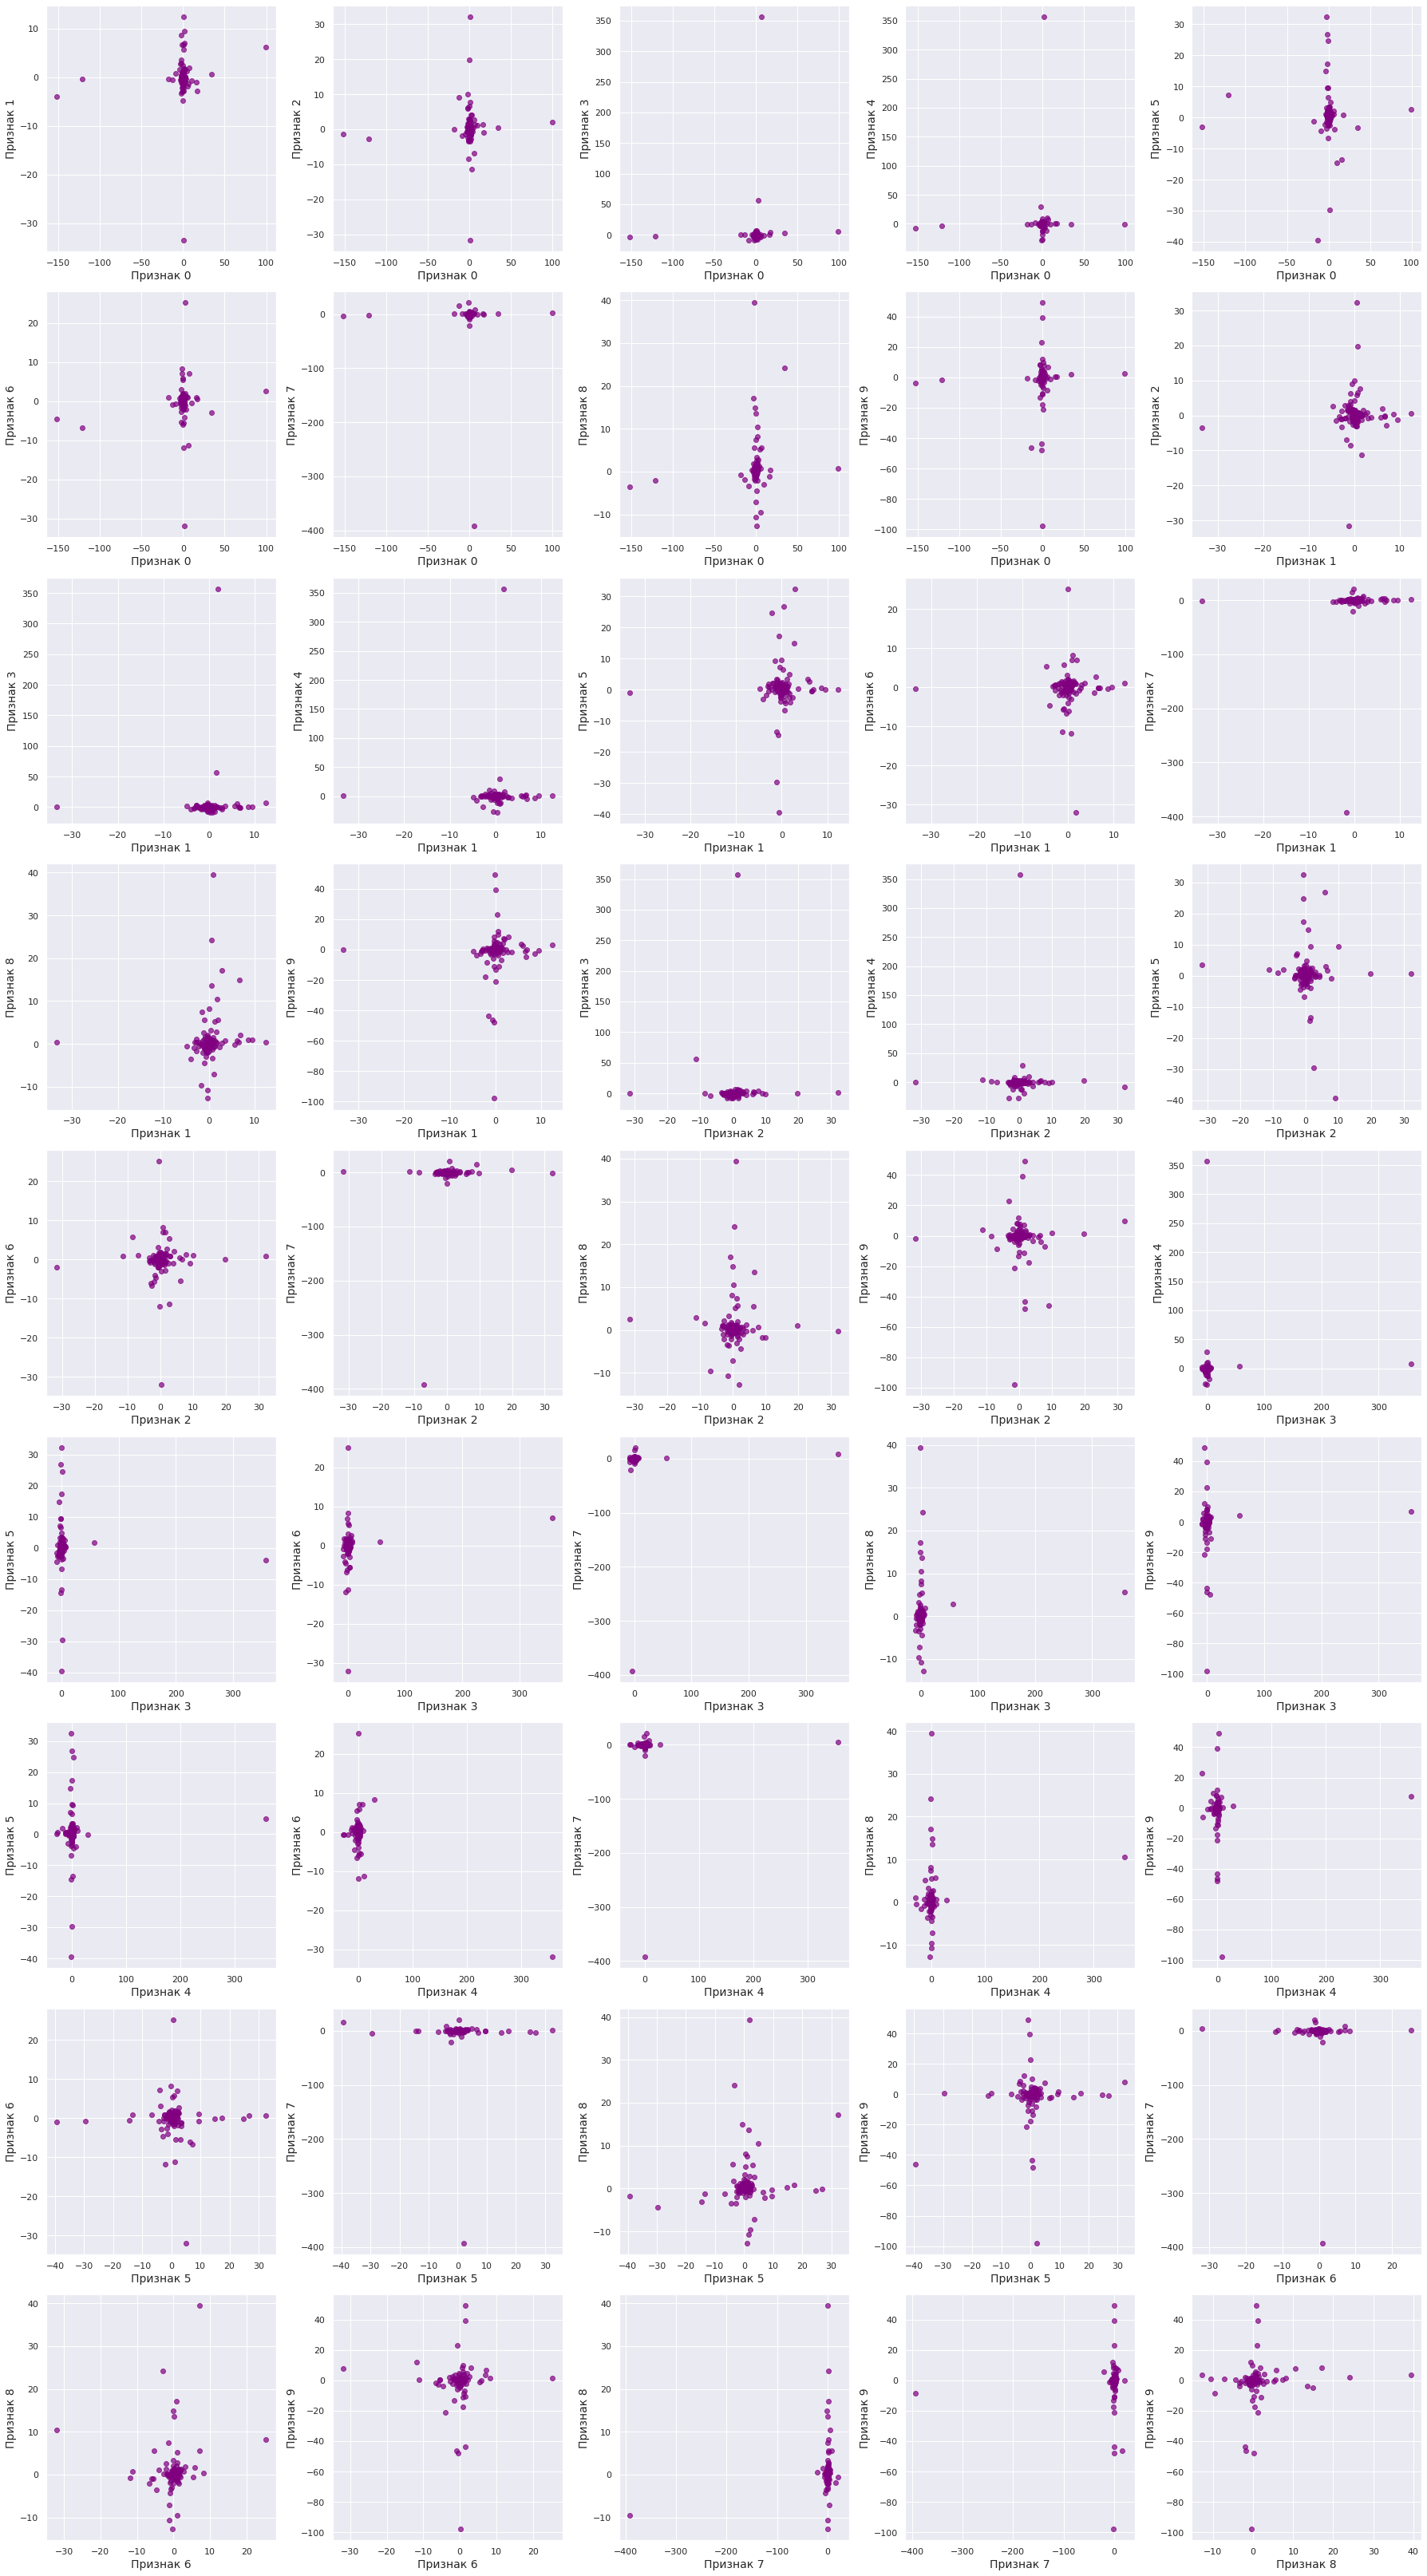

In [ ]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(25, 45))

  plt.title('Попарные графики выборок', fontsize=16)
  cnt = 0
  for i in range(10):
    for j in range(i + 1, 10):
      cnt += 1
      plt.subplot(9, 5, cnt)
      plt.scatter(x=data[i], y = data[j], c='purple', alpha=0.7);
      plt.xlabel(f'Признак {i}', fontsize=14)
      plt.ylabel(f'Признак {j}', fontsize=14)

  plt.tight_layout()

Во-первых видно, что у некоторых признаков присутствуют выбросы - например у 4-го признака, у 6 и у 7.

Построим также матрицу корреляций

<Axes: >

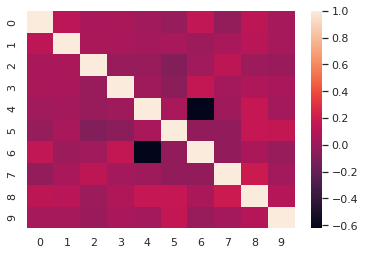

In [ ]:
df = pd.DataFrame(data.T)
sns.heatmap(df.corr())

Матрица корреляций ничего особенного мне не говорит

Давайте посчитаем коэффициент конкордации который проверяет гипотезу о совместной некоррелированности

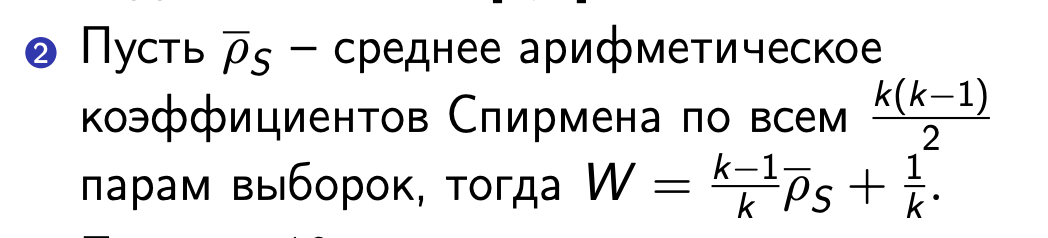


In [ ]:
k = 10
n = 100
spirmans = []

for i in range(10):
  for j in range(i + 1, 10):
    spirmans.append(spearmanr(data[i], data[j]).correlation)

spearman_mean = np.mean(spirmans)

concordance = (k - 1) / k * spearman_mean + 1 / k
stat = k * (n - 1) * concordance

print(f'Статистика: {stat}')

quant = sps.chi2(df=(n - 1)).ppf(1 - alpha)

print('Гипотеза отвергается') if stat > quant else print('Гипотеза не отвергается')

Статистика: 191.92348514851489
Гипотеза отвергается


Получили результат что выборки зависимы в совокупности

Теперь чтоб определить попарную независимость используем метод Холма контроллирующий FWER на уровне 0.05

Для этого у нас будет 45 гипотез о попарной независимости

каждое p_value будем насчитывать через коэффициент Спирмена

Я не нашла подобной реализации в sps так что напишу сама

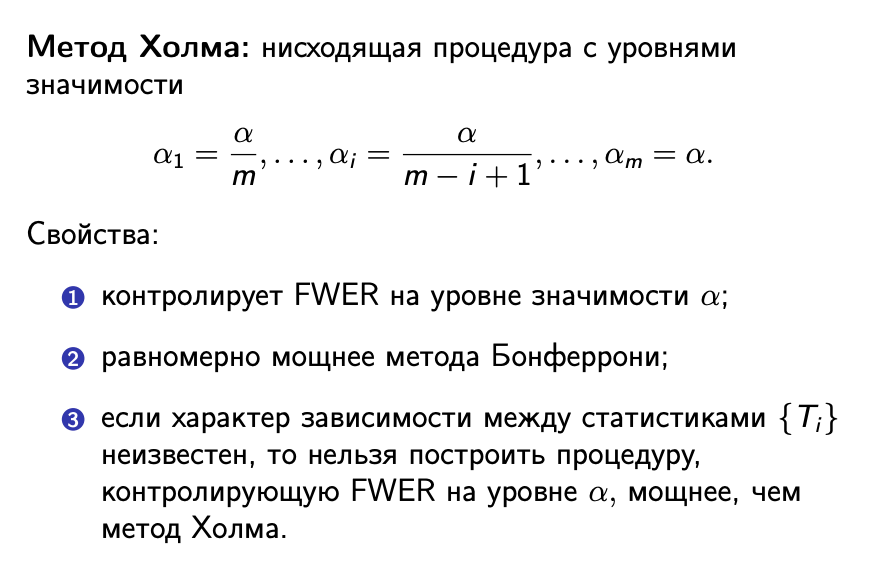

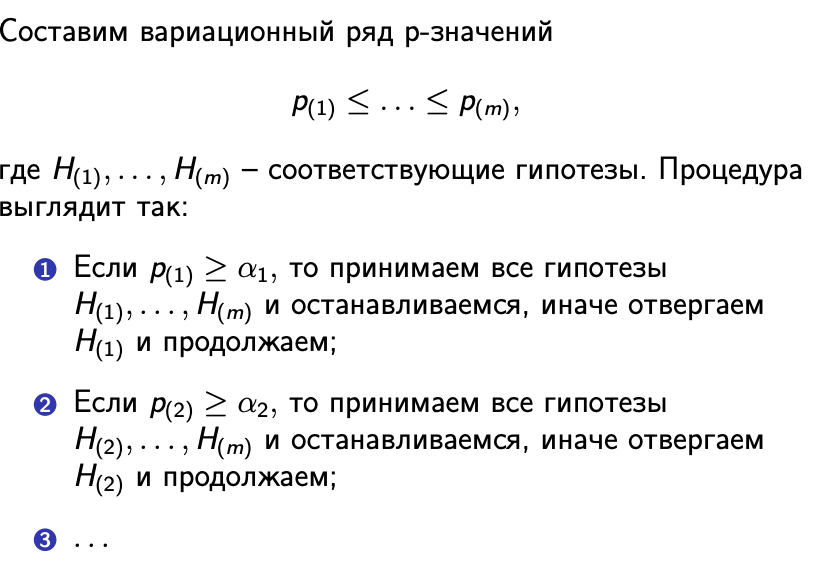

$H_i : $ какая то пара признаков нескореллирована

In [ ]:
alpha = 0.05
m = 45
corrected_alphas = [alpha / (m - i + 1) for i in range(1, 46, 1)]
assert len(corrected_alphas) == m

In [ ]:
p_vals = []

for i in range(10):
  for j in range(i + 1, 10):
    pval = spearmanr(data[i], data[j]).pvalue
    values = {
        'Признак 1': i,
        'Признак 2': j,
        'p_value': pval,
    }
    p_vals.append(values)

assert len(p_vals) == m

In [ ]:
p_vals = sorted(p_vals, key=lambda d: d['p_value'])
p_vals

[{'Признак 1': 1, 'Признак 2': 8, 'p_value': 0.0010006699569842011},
 {'Признак 1': 3, 'Признак 2': 7, 'p_value': 0.012343696790636422},
 {'Признак 1': 0, 'Признак 2': 3, 'p_value': 0.012588622848083814},
 {'Признак 1': 8, 'Признак 2': 9, 'p_value': 0.023546923549711694},
 {'Признак 1': 0, 'Признак 2': 9, 'p_value': 0.028545500773815024},
 {'Признак 1': 6, 'Признак 2': 8, 'p_value': 0.033855860452993485},
 {'Признак 1': 7, 'Признак 2': 8, 'p_value': 0.03867728218254629},
 {'Признак 1': 0, 'Признак 2': 7, 'p_value': 0.04059458496284102},
 {'Признак 1': 1, 'Признак 2': 9, 'p_value': 0.044085958367100164},
 {'Признак 1': 2, 'Признак 2': 3, 'p_value': 0.046276667236984925},
 {'Признак 1': 1, 'Признак 2': 7, 'p_value': 0.05589815418005777},
 {'Признак 1': 4, 'Признак 2': 7, 'p_value': 0.05693817529336936},
 {'Признак 1': 3, 'Признак 2': 8, 'p_value': 0.068069660653311},
 {'Признак 1': 2, 'Признак 2': 6, 'p_value': 0.08534180231196938},
 {'Признак 1': 7, 'Признак 2': 9, 'p_value': 0.11191074

In [ ]:
for i, pval in enumerate(p_vals):
  if pval['p_value'] >= corrected_alphas[i]:
    print('Все остальные гипотезы приняты')
    break
  else:
    f = pval['Признак 1']
    s = pval['Признак 2']
    print(f'Гипотеза о нескореллированности признаков {f} и {s} отвергнута')

Гипотеза о нескореллированности признаков 1 и 8 отвергнута
Все остальные гипотезы приняты


То есть мы наблюдаем любопытный эффект - когда в совокупности выборка зависима но при этом все пары признаков кроме одной независимы попарно. Такое может быть обьяснено тем , что 

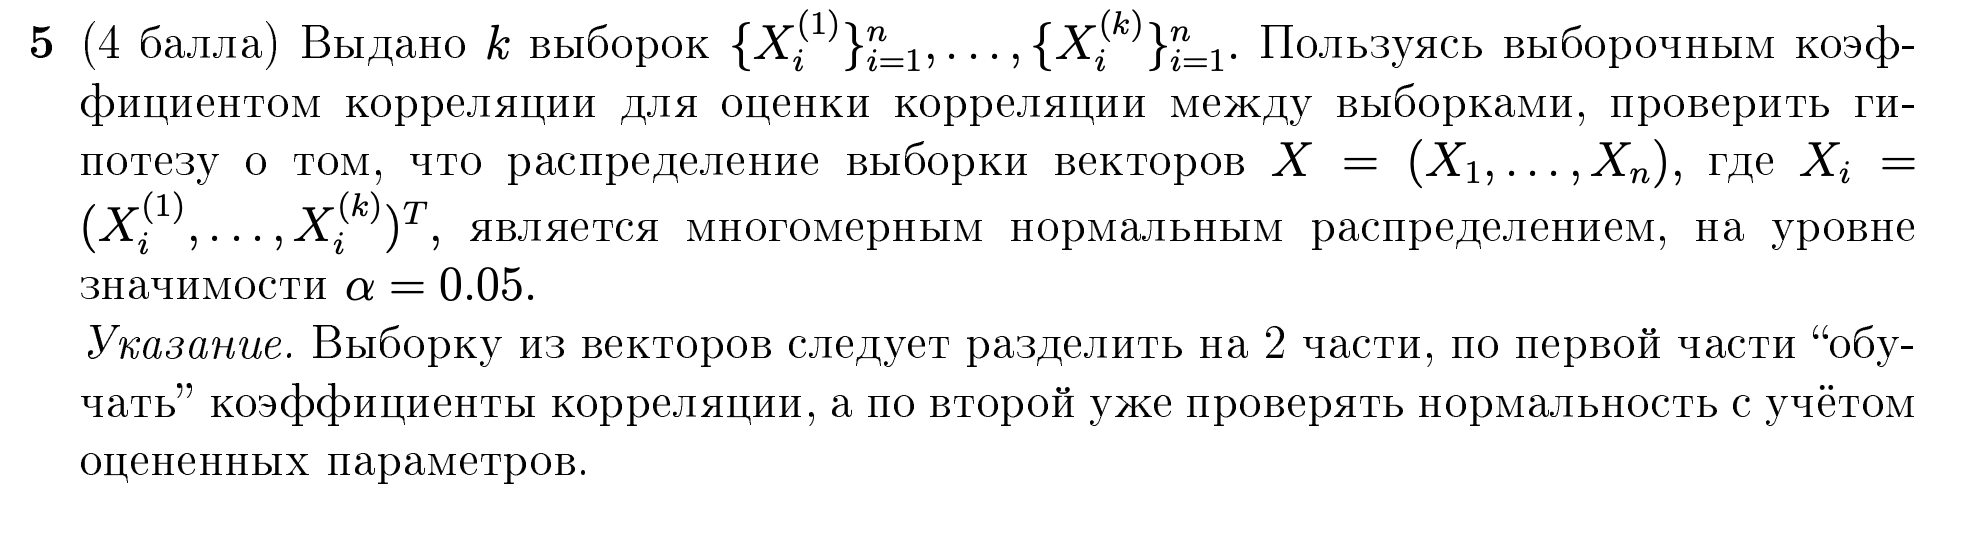

In [ ]:
alpha = 0.05

data = np.load('hw5t5.npy')
data.shape

(4, 200)

In [ ]:
k = 4
n = 200

samples = data.T

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(samples, test_size=0.5)
train.shape

(100, 4)

У многомерного нормального распределения много сложных определений. И я не придумала как с ними работать - поэтому идея в следующем:

- по тренировочной выборке посчитать матрицу ковариаций и вектор средних
- затем можно будет представить выборку из многомерного нормального распределения через многомерное стандартное нормальное (вынести вектор матожей и корень из матрицы ковариаций который удобнее всего брать через спектрального разложение)
- когда мы уже имеем вид в многомерном стандартном нормальном - проще на тестовой части проверять нормальность - нужно будет всего лишь проверишь нормальность каждой компоненты (МПГ) а так же независимость (ура - вылезли коэффициенты корреляции)


In [ ]:
vec_means = np.mean(train.T, axis=1)

cov_matrix = np.cov(train.T)
print(len(vec_means), cov_matrix.shape)

4 (4, 4)


Чтоб сделать преобразование из нашей величины в стандартное многомерное нормальное - нужно использовать следующую формулу:

$\Sigma^{-\frac{1}{2}}(X - \mu) $

Это мы применим к тестовой выборке и потом проверим нужные требования (нормальность каждой компоненты и их независимость

In [ ]:
import scipy

inv_sigma = np.linalg.inv(scipy.linalg.sqrtm(cov_matrix))

changed_test = np.array([
    inv_sigma @ (elem - vec_means) for elem in test
])

changed_test.shaped

(100, 4)

Применим метод Холма для проверки на нормальность

In [ ]:
from statsmodels.sandbox.stats.multicomp import multipletests

pval_sh = [sps.shapiro(samp)[1] for samp in changed_test.T]

rejects, mpt_dt, _, _ = multipletests(pval_sh, method='holm')
rejects

array([False, False, False, False])

Видно что нормальность компонент не отвергается - перейдем к проверке независимости

Так как независимость в совокупности сильнее попарной - применю коэффициент конкордации как и в предыдущей задаче

In [ ]:
changed_test = changed_test.T
changed_test.shape

(4, 100)

In [ ]:
spirmans = []

for i in range(k):
  for j in range(i + 1, k):
    spirmans.append(spearmanr(changed_test[i, :], changed_test[j, :]).correlation)

spearman_mean = np.mean(spirmans)

concordance = (k - 1) / k * spearman_mean + 1 / k
stat = k * (n - 1) * concordance

print(f'Статистика: {stat}')

quant = sps.chi2(df=(n - 1)).ppf(1 - alpha)

print('Гипотеза отвергается') if stat > quant else print('Гипотеза не отвергается')

Статистика: 153.60196819681968
Гипотеза не отвергается


Получается гипотеза о совместной нескоррелированности не отверглась как и гипотеза о нормальности компонент - значит умозаключаем, что выборка действительно из многомерного нормального распределения

По приколу нашла еще тесты в интернете - проверим ими

In [ ]:
!pip3 install pingouin

In [ ]:
from pingouin import multivariate_normality

multivariate_normality(changed_test.T, alpha=.05)

HZResults(hz=0.8079504538490635, pval=0.4877871060325991, normal=True)

Этот критерий также не отклоняет гипотезу!